<a href="https://colab.research.google.com/github/rgclapp007/pulse_atmosphere/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use this week to ramp up comfort with Jupyter, python, plotting etc
Tutorial Jupyter notebooks taking students through basic functions necessary for assignments
One tutorial notebook per assignment teaching necessary functions? This is something I’ve seen done for a linear algebra class and I really liked it, I’m implementing it for an intro complex analysis/diffeq class already (with MATLAB live scripts, not Jupyter notebooks, but same idea of dynamic execution)
Take CO2 data CSV from ARSET training, assign each student a country to create budget for each year and average, and plot over the years and compare to the mean
Everyone posts their estimates
After the assignment is due, students work together in class to create a choropleth using plotly (https://plotly.com/python/#maps) mapping CO2 budget in/out for countries
Will need a shapefile of country borders for this


# Taking the Pulse of the Planet
## Assignment 1: Calculating the CO$_2$ Budget
#### written by Tea Susskind

Welcome to Python. If you're reading this, you've successfully opened Jupyter Lab. To write code, you need to download Python "packages" (collections of files with code to perform certain related operations) and "import" them (tell the script to read in these operations so we can use them in this file).

Now we need to download the packages we'll need. Everytime you reopen this note book you will need to rerun the next cell.

In [ ]:
!pip install numpy scipy matplotlib pandas plotly geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Finally, we can start coding. First we need to import the packages we've just downloaded.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Was not sure what was this for?
pd.options.mode.chained_assignment = None  # default='warn'
import geopandas as gpd

We want to calculate the CO$_2$ budget for a country of your choice. So our first step is to read in the data from a comma separated value (CSV) file and put it into a data structure called a panda which can easily read in this input file and store a lot of different kinds of data. The first 51 rows of the file are just describing the variables, so we skip them when we read it in.

In [ ]:
co2_data = pd.read_csv("http://appliedsciences.nasa.gov/sites/default/files/2022-05/CO2_Budget_Byrneetal2022_v1.csv", skiprows=51)

To get a sense of what the data looks like, Jupyter Lab allows us to get a preview of it it by simply running a cell with its name

In [ ]:
co2_data.head(3)

,Alpha 3 Code,Year,IS dC_loss (TgCO2),IS dC_loss unc (TgCO2),LNLG dC_loss (TgCO2),LNLG dC_loss unc (TgCO2),LNLGIS dC_loss (TgCO2),LNLGIS dC_loss unc (TgCO2),LNLGOGIS dC_loss (TgCO2),LNLGOGIS dC_loss unc (TgCO2),...,River unc (TgCO2),Wood+Crop (TgCO2),Wood+Crop unc (TgCO2),FF (TgCO2),FF unc (TgCO2),Z-statistic,IAD IS,IAD LNLG,IAD LNLGIS,IAD LNLGOGIS
0,AFG,2015,1.197130,41.8719,54.6349,179.753,39.3407,153.746,-0.976738,112.483,...,1.69832,4.05648,1.21694,19.3894,0.797698,0.37,0.01,0.2,0.19,0.03
1,AFG,2016,-1.266900,32.3623,67.5523,234.094,50.6167,175.454,17.683400,117.572,...,2.24033,4.05648,1.21694,20.5220,0.678080,0.31,0.01,0.2,0.19,0.03
2,AFG,2017,-0.073316,43.4440,77.1190,233.244,54.5096,179.794,10.316500,127.746,...,2.37705,4.05648,1.21694,21.0629,0.695856,0.47,0.01,0.2,0.19,0.03


We can see that there are six years of data (2015-2020, inclusive) per country. Look up your chosen country's Alpha 3 code and edit the following code block to just select the data from that country:

In [ ]:
# CHANGE BELOW LINE:
country_code = 'ARG'
country_co2_data = co2_data.loc[co2_data['Alpha 3 Code'] == country_code]

Use the following cell to check that you have the values you want by displaying your new panda structure.

In [ ]:
# to delete
country_co2_data

,Alpha 3 Code,Year,IS dC_loss (TgCO2),IS dC_loss unc (TgCO2),LNLG dC_loss (TgCO2),LNLG dC_loss unc (TgCO2),LNLGIS dC_loss (TgCO2),LNLGIS dC_loss unc (TgCO2),LNLGOGIS dC_loss (TgCO2),LNLGOGIS dC_loss unc (TgCO2),...,River unc (TgCO2),Wood+Crop (TgCO2),Wood+Crop unc (TgCO2),FF (TgCO2),FF unc (TgCO2),Z-statistic,IAD IS,IAD LNLG,IAD LNLGIS,IAD LNLGOGIS
28,ARG,2015,112.047,242.044,-719.161,700.999,-398.645,741.318,47.8970,835.261,...,2.865550,-114.094,-34.2282,197.824,19.3936,-1.15,0.28,0.7,0.72,0.72
29,ARG,2016,-210.205,367.245,-1096.460,288.668,-991.864,396.966,-253.8120,545.195,...,3.954050,-114.094,-34.2282,198.224,19.3036,-1.71,0.28,0.7,0.72,0.72
30,ARG,2017,-327.038,315.110,-913.552,470.527,-624.537,582.199,-595.9920,678.966,...,0.457247,-114.094,-34.2282,193.454,18.9496,-1.51,0.28,0.7,0.72,0.72
31,ARG,2018,-245.061,217.192,-815.288,552.578,-366.575,657.288,-482.8150,403.436,...,2.375250,-114.094,-34.2282,190.159,18.9496,-1.28,0.28,0.7,0.72,0.72
32,ARG,2019,-213.240,354.183,-1272.550,558.181,-1186.130,727.737,-623.3160,489.948,...,3.246230,-114.094,-34.2282,184.636,19.3936,-1.73,0.28,0.7,0.72,0.72
33,ARG,2020,-418.437,395.979,-878.118,457.886,-976.530,447.187,-84.6341,479.598,...,2.579660,-114.094,-34.2282,171.286,19.3936,-0.69,0.28,0.7,0.72,0.72
34,ARG,mean,-184.154,197.942,-1052.830,478.819,-655.320,472.673,-353.5240,592.391,...,2.579660,-114.094,-34.2282,189.264,19.2306,-1.52,0.28,0.7,0.72,0.72


In [ ]:
# Do we have meta data for these keys?
country_co2_data.keys()

Index(['Alpha 3 Code', 'Year', 'IS dC_loss (TgCO2)', 'IS dC_loss unc (TgCO2)',
       'LNLG dC_loss (TgCO2)', 'LNLG dC_loss unc (TgCO2)',
       'LNLGIS dC_loss (TgCO2)', 'LNLGIS dC_loss unc (TgCO2)',
       'LNLGOGIS dC_loss (TgCO2)', 'LNLGOGIS dC_loss unc (TgCO2)',
       'IS NBE (TgCO2)', 'IS NBE unc (TgCO2)', 'LNLG NBE (TgCO2)',
       'LNLG NBE unc (TgCO2)', 'LNLGIS NBE (TgCO2)', 'LNLGIS NBE unc (TgCO2)',
       'LNLGOGIS NBE (TgCO2)', 'LNLGOGIS NBE unc (TgCO2)', 'IS NCE (TgCO2)',
       'IS NCE unc (TgCO2)', 'LNLG NCE (TgCO2)', 'LNLG NCE unc (TgCO2)',
       'LNLGIS NCE (TgCO2)', 'LNLGIS NCE unc (TgCO2)', 'LNLGOGIS NCE (TgCO2)',
       'LNLGOGIS NCE unc (TgCO2)', 'Rivers (TgCO2)', 'River unc (TgCO2)',
       'Wood+Crop (TgCO2)', 'Wood+Crop unc (TgCO2)', 'FF (TgCO2)',
       'FF unc (TgCO2)', 'Z-statistic', 'IAD IS', 'IAD LNLG', 'IAD LNLGIS',
       'IAD LNLGOGIS'],
      dtype='object')

Recall the equation to calculate net carbon exchange (NCE) from class, $$NCE = \Delta C_{loss} + FF + F_{crop_{trade}} + F_{wood_{trade}} + F_{rivers_{export}}$$
We can see above that we have the necessary variables and uncertainty values to use this carbon balance equation with our different data sources: IS, LNLG, LNLGIS, and LNLGOGIS. There are multiple ways to sum columns. Two of them have been implemented for IS and LNLG. Use these to find the NCE for the other two data sources.

In [ ]:
country_co2_data['NCE_IS']  = country_co2_data['IS dC_loss (TgCO2)'] + country_co2_data['FF (TgCO2)'] + country_co2_data['Wood+Crop (TgCO2)'] + country_co2_data['Rivers (TgCO2)']

In [ ]:
country_co2_data['NCE_LNLG'] =  country_co2_data[['LNLG dC_loss (TgCO2)','FF (TgCO2)','Wood+Crop (TgCO2)','Rivers (TgCO2)']].sum(axis=1)

In [ ]:
# to delete
country_co2_data['NCE_LNLGIS'] =  country_co2_data[['LNLG dC_loss (TgCO2)','FF (TgCO2)','Wood+Crop (TgCO2)','Rivers (TgCO2)']].sum(axis=1)
country_co2_data['NCE_LNLGOGIS'] =  country_co2_data[['LNLGOGIS dC_loss (TgCO2)','FF (TgCO2)','Wood+Crop (TgCO2)','Rivers (TgCO2)']].sum(axis=1)

If we display the `country_co2_data` structure again, we can see the added columns.

In [ ]:
country_co2_data

,Alpha 3 Code,Year,IS dC_loss (TgCO2),IS dC_loss unc (TgCO2),LNLG dC_loss (TgCO2),LNLG dC_loss unc (TgCO2),LNLGIS dC_loss (TgCO2),LNLGIS dC_loss unc (TgCO2),LNLGOGIS dC_loss (TgCO2),LNLGOGIS dC_loss unc (TgCO2),...,FF unc (TgCO2),Z-statistic,IAD IS,IAD LNLG,IAD LNLGIS,IAD LNLGOGIS,NCE_IS,NCE_LNLG,NCE_LNLGIS,NCE_LNLGOGIS
28,ARG,2015,112.047,242.044,-719.161,700.999,-398.645,741.318,47.8970,835.261,...,19.3936,-1.15,0.28,0.7,0.72,0.72,156.7037,-674.5043,-674.5043,92.5537
29,ARG,2016,-210.205,367.245,-1096.460,288.668,-991.864,396.966,-253.8120,545.195,...,19.3036,-1.71,0.28,0.7,0.72,0.72,-165.6926,-1051.9476,-1051.9476,-209.2996
30,ARG,2017,-327.038,315.110,-913.552,470.527,-624.537,582.199,-595.9920,678.966,...,18.9496,-1.51,0.28,0.7,0.72,0.72,-285.5472,-872.0612,-872.0612,-554.5012
31,ARG,2018,-245.061,217.192,-815.288,552.578,-366.575,657.288,-482.8150,403.436,...,18.9496,-1.28,0.28,0.7,0.72,0.72,-205.4489,-775.6759,-775.6759,-443.2029
32,ARG,2019,-213.240,354.183,-1272.550,558.181,-1186.130,727.737,-623.3160,489.948,...,19.3936,-1.73,0.28,0.7,0.72,0.72,-178.7154,-1238.0254,-1238.0254,-588.7914
33,ARG,2020,-418.437,395.979,-878.118,457.886,-976.530,447.187,-84.6341,479.598,...,19.3936,-0.69,0.28,0.7,0.72,0.72,-399.0511,-858.7321,-858.7321,-65.2482
34,ARG,mean,-184.154,197.942,-1052.830,478.819,-655.320,472.673,-353.5240,592.391,...,19.2306,-1.52,0.28,0.7,0.72,0.72,-146.7901,-1015.4661,-1015.4661,-316.1601


Now that we have calculated these balances, we can plot them by year. We don't want to plot the mean data so we can remove it and store it separately.

In [ ]:
co2_to_plot = country_co2_data[country_co2_data.Year != "mean"]
means = country_co2_data[country_co2_data.Year == "mean"]

In [ ]:
plt.style.use('ggplot')

Now plot assign each student a country to create budget for each year and average, and plot over the years and compare to the mean

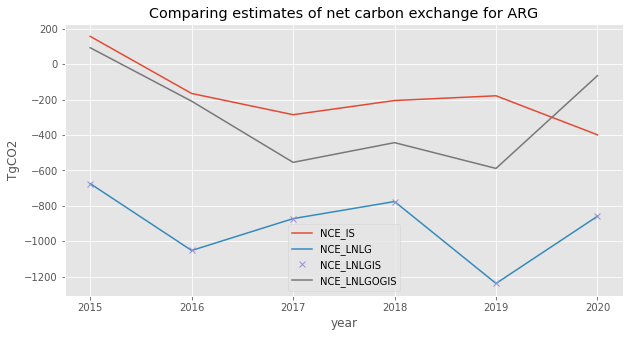

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.plot(co2_to_plot['Year'],co2_to_plot['NCE_IS'], label='NCE_IS')
plt.plot(co2_to_plot['Year'],co2_to_plot['NCE_LNLG'], label='NCE_LNLG')
# Was a bit confusing that NCE_LNLG and NCE_LNLGIS are coincident
plt.plot(co2_to_plot['Year'],co2_to_plot['NCE_LNLGIS'], label='NCE_LNLGIS', marker='x', linestyle='None')
plt.plot(co2_to_plot['Year'],co2_to_plot['NCE_LNLGOGIS'], label='NCE_LNLGOGIS')
plt.legend()
# plt.legend(['NCE_IS','NCE_LNLG','NCE_LNLGIS','NCE_LNLGOGIS'])
# tle = 'Comparing estimates of net carbon exchange for ' + country_code
tle = 'Comparing estimates of net carbon exchange for {:s}'.format(country_code)
plt.title(tle)
plt.xlabel('year')
plt.ylabel('TgCO2')
plt.show()

In [ ]:
co2_to_plot['NCE_LNLG']

28    -674.5043
29   -1051.9476
30    -872.0612
31    -775.6759
32   -1238.0254
33    -858.7321
Name: NCE_LNLG, dtype: float64

If you have time, explore this resource to play around with line styles. Now, note that the data frame also has the uncertainties for each of these measurements. Can you 

## Questions from Seogi
- Worthwhile to introduce Jupyter Lab first? (concept of cells? how to run?)
- You are first introducing pandas's `Dataframe`, and how that can be used to quarry the data. Would you even use numpy and scipy? 
- You then introduce `matplotlib`
- May be worth while to show how the `Dataframe` is connected to numpy array?
  (at the moment we do not even need `numpy`, `geopandas`, 
- 